# A1.1

Use the WineTrain.csv training file and the sklearn.tree.DecisionTreeClassifier CART implementation to build a decision tree without pruning to predict whether the quality label is low, medium or high. Use it to predict the class labels of both the train and test set.

without pruning.                                                                                                           predict the class labels of both the train and test set.

Use the parameter random_state=0 

In [40]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import accuracy_score

In [25]:
train_df = pd.read_csv("WineTrain.csv", index_col=0)
test_df = pd.read_csv("WineTest.csv", index_col=0)

In [42]:
Ytrain = train_df['Quality']
Xtrain = train_df.drop(['Quality'], axis = 1)

In [43]:
Ytest = test_df['Quality']
Xtest = test_df.drop(['Quality'], axis = 1)

In [44]:
DecisionTree = DecisionTreeClassifier(random_state=0)

In [45]:
DecisionTree = DecisionTree.fit(Xtrain, Ytrain)

In [46]:
y_train_pred = DecisionTree.predict(Xtrain)
y_test_pred = DecisionTree.predict(Xtest)

In [47]:
DecisionTreeDescription = DecisionTree.tree_
print(DecisionTreeDescription.node_count)

445


In [48]:
from sklearn.metrics import accuracy_score
print(accuracy_score(Ytrain, y_train_pred))
print(accuracy_score(Ytest, y_test_pred))

1.0
0.5008347245409015


# Part 2


Use 25 % of the training data to build a decision tree with CART (without pruning; use the exact same meta-parameters as before, and the same random seed as before) 

In [21]:
from sklearn.tree import DecisionTreeClassifier
import pandas as pd

frame = pd.DataFrame(columns = ["Run", "NodeCount", "TrainAcc", "TestAcc"])

# TODO: replace by your own python code

# Test set
Ytest = test_df['Quality']
Xtest = test_df.drop(['Quality'], axis = 1)

# Train set - for each i
for i in range(100):
    sample_train = train_df.sample(frac=0.25, random_state=i)
    
    # Separate Quality and others
    Ytrain = sample_train['Quality']
    Xtrain = sample_train.drop(['Quality'], axis = 1)
    
    # Creating classifier
    DecisionTree = DecisionTreeClassifier(random_state=0)
    DecisionTree = DecisionTree.fit(Xtrain, Ytrain)
    
    # Classifier
    y_train_pred = DecisionTree.predict(Xtrain)
    y_test_pred = DecisionTree.predict(Xtest)
    
    #Nb_nodes
    nb_nodes =  DecisionTree.tree_.node_count
    
    # Accuracy
    TrainScore = accuracy_score(Ytrain, y_train_pred)
    TestScore = accuracy_score(Ytest, y_test_pred)
    
    # Add on frame
    run_row = {'Run':i, 'NodeCount':nb_nodes, 'TrainAcc':TrainScore, 'TestAcc':TestScore}
    frame=frame.append(run_row, ignore_index=True)

mean_nb_nodes = frame.mean(axis = 0)['NodeCount']
mean_train_accur = frame.mean(axis = 0)['TrainAcc']
mean_test_accur = frame.mean(axis = 0)['TestAcc']

In [24]:
mean_test_accur

0.5037228714524206

# Q5

In [26]:
from sklearn.tree import DecisionTreeClassifier
import pandas as pd

frame = pd.DataFrame(columns = ["Frac", "Run", "NodeCount", "TrainAcc", "TestAcc"])

# TODO: replace by your own python code

Fractions = [0.05, 0.1, 0.2, 0.5, 0.99]

# Test set
Ytest = test_df['Quality']
Xtest = test_df.drop(['Quality'], axis = 1)

for frac in Fractions:
    # Train set - for each i
    for i in range(100):
        sample_train = train_df.sample(frac=frac, random_state=i)

        # Separate Quality and others
        Ytrain = sample_train['Quality']
        Xtrain = sample_train.drop(['Quality'], axis = 1)

        # Creating classifier
        DecisionTree = DecisionTreeClassifier(random_state=0)
        DecisionTree = DecisionTree.fit(Xtrain, Ytrain)

        # Classifier
        y_train_pred = DecisionTree.predict(Xtrain)
        y_test_pred = DecisionTree.predict(Xtest)

        #Nb_nodes
        nb_nodes =  DecisionTree.tree_.node_count

        # Accuracy
        TrainScore = accuracy_score(Ytrain, y_train_pred)
        TestScore = accuracy_score(Ytest, y_test_pred)

        # Add on frame
        run_row = {'Frac':frac, 'Run':i, 'NodeCount':nb_nodes, 'TrainAcc':TrainScore, 'TestAcc':TestScore}
        frame=frame.append(run_row, ignore_index=True)

In [28]:
frame

,Frac,Run,NodeCount,TrainAcc,TestAcc
0,0.05,0.0,27.0,1.0,0.529215
1,0.05,1.0,25.0,1.0,0.484140
2,0.05,2.0,29.0,1.0,0.500835
3,0.05,3.0,29.0,1.0,0.509182
4,0.05,4.0,25.0,1.0,0.505843
...,...,...,...,...,...
495,0.99,95.0,435.0,1.0,0.515860
496,0.99,96.0,443.0,1.0,0.505843
497,0.99,97.0,445.0,1.0,0.490818
498,0.99,98.0,427.0,1.0,0.515860


# Q6

<AxesSubplot:title={'center':'NodeCount'}, xlabel='Frac'>

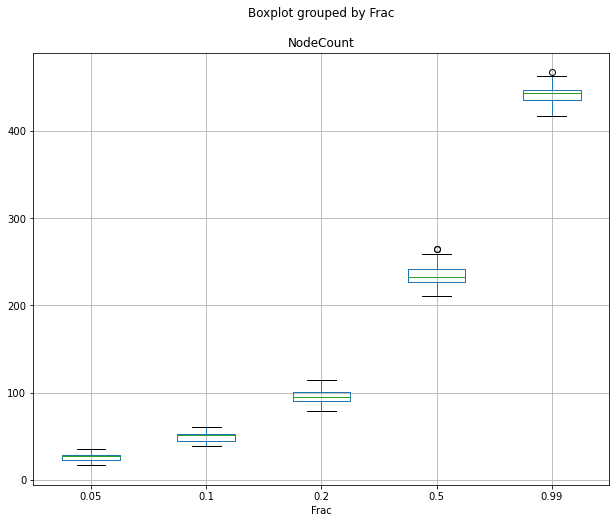

In [29]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(10,8))
plt.suptitle('')
frame.boxplot(column=['NodeCount'], by='Frac', ax=ax)

<AxesSubplot:title={'center':'TestAcc'}, xlabel='Frac'>

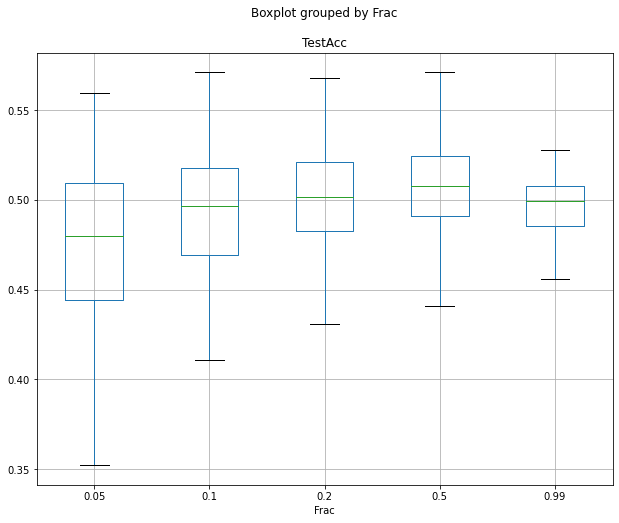

In [30]:
fig, ax = plt.subplots(figsize=(10,8))
plt.suptitle('')
frame.boxplot(column=['TestAcc'], by='Frac', ax=ax)

In [31]:
asdf = frame.groupby(['Frac']).mean()

<AxesSubplot:xlabel='NodeCount'>

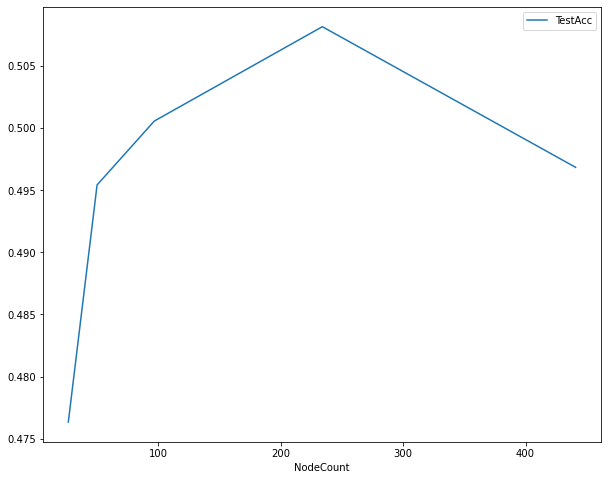

In [63]:
fig, ax = plt.subplots(figsize=(10,8))
plt.suptitle('')
asdf.plot(kind='line',x='NodeCount',y='TestAcc',ax=ax)

# A1.2

## Pre-pruning the tree

In [32]:
train_df = pd.read_csv("WineTrain.csv", index_col=0)
test_df = pd.read_csv("WineTest.csv", index_col=0)

In [33]:
from sklearn.tree import DecisionTreeClassifier
import pandas as pd
import numpy as np

frame = pd.DataFrame(columns = ["min_samples_split", "NodeCount", "TrainAcc", "TestAcc"])

# TODO: replace by your own python code

# Set
Ytrain = train_df['Quality']
Xtrain = train_df.drop(['Quality'], axis = 1)
Ytest = test_df['Quality']
Xtest = test_df.drop(['Quality'], axis = 1)

# Test each number of splits
for split in range(2, 1000):
    DecisionTree = DecisionTreeClassifier(random_state=0,  min_samples_split=split)
    DecisionTree = DecisionTree.fit(Xtrain, Ytrain)
    
    # Prediction
    y_train_pred = DecisionTree.predict(Xtrain)
    y_test_pred = DecisionTree.predict(Xtest)
    
    #Nb_nodes
    nb_nodes =  DecisionTree.tree_.node_count
    
    # Accuracy
    TrainScore = accuracy_score(Ytrain, y_train_pred)
    TestScore = accuracy_score(Ytest, y_test_pred)
    
    # Add on frame
    run_row = {'min_samples_split':split, 'NodeCount':nb_nodes, 'TrainAcc':TrainScore, 'TestAcc':TestScore}
    frame=frame.append(run_row, ignore_index=True)

In [37]:
from sklearn.tree import DecisionTreeClassifier
import pandas as pd
import numpy as np

frame = pd.DataFrame(columns = ["min_samples_split", "NodeCount", "TrainAcc", "TestAcc"])

# TODO: replace by your own python code

# Set
Ytrain = train_df['Quality']
Xtrain = train_df.drop(['Quality'], axis = 1)
Ytest = test_df['Quality']
Xtest = test_df.drop(['Quality'], axis = 1)

# Test each number of splits
for split in (5, 100, 120):
    DecisionTree = DecisionTreeClassifier(random_state=0,  min_samples_split=split)
    DecisionTree = DecisionTree.fit(Xtrain, Ytrain)
    
    # Prediction
    y_train_pred = DecisionTree.predict(Xtrain)
    y_test_pred = DecisionTree.predict(Xtest)
    
    #Nb_nodes
    nb_nodes =  DecisionTree.tree_.node_count
    
    # Accuracy
    TrainScore = accuracy_score(Ytrain, y_train_pred)
    TestScore = accuracy_score(Ytest, y_test_pred)
    
    # Add on frame
    run_row = {'min_samples_split':split, 'NodeCount':nb_nodes, 'TrainAcc':TrainScore, 'TestAcc':TestScore}
    frame=frame.append(run_row, ignore_index=True)

In [38]:
frame

,min_samples_split,NodeCount,TrainAcc,TestAcc
0,5.0,367.0,0.960,0.484140
1,100.0,47.0,0.703,0.574290
2,120.0,31.0,0.699,0.584307


In [34]:
frame.iloc[frame['TestAcc'].argmax()]

min_samples_split    120.000000
NodeCount             31.000000
TrainAcc               0.699000
TestAcc                0.584307
Name: 118, dtype: float64

<AxesSubplot:xlabel='min_samples_split'>

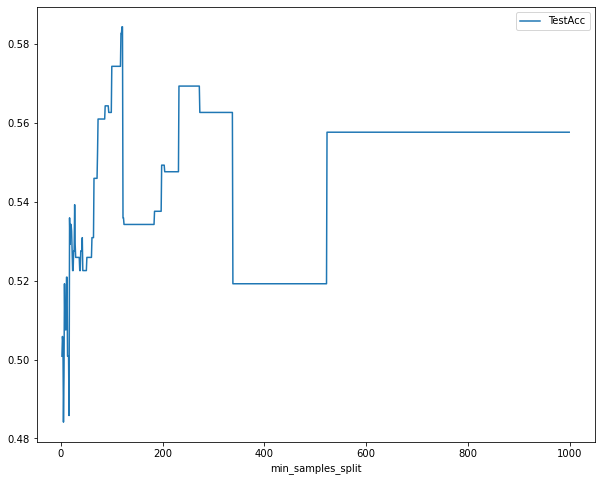

In [35]:
fig, ax = plt.subplots(figsize=(10,8))
plt.suptitle('')
frame.plot(kind='line',x='min_samples_split',y='TestAcc',ax=ax)

In [36]:
frame.iloc[frame['TestAcc'].argmin()]

min_samples_split      5.00000
NodeCount            367.00000
TrainAcc               0.96000
TestAcc                0.48414
Name: 3, dtype: float64

## Q2

In [83]:
train_df = pd.read_csv("WineTrain.csv", index_col=0)
test_df = pd.read_csv("WineTest.csv", index_col=0)

In [197]:
from sklearn.tree import DecisionTreeClassifier
import pandas as pd
from sklearn.metrics import accuracy_score

frame = pd.DataFrame(columns = ["min_samples_split", "Frac", "Run", "NodeCount", "TrainAcc", "TestAcc"])

# TODO: replace by your own python code

# Test set
Ytest = test_df['Quality']
Xtest = test_df.drop(['Quality'], axis = 1)

for split in range(60, 181, 5):
    for frac in range(50, 100, 5):
        frac = frac/100
        # Train set - for each i
        for i in range(0, 1001, 50):
            sample_train = train_df.sample(frac=frac, random_state=i)

            # Separate Quality and others
            Ytrain = sample_train['Quality']
            Xtrain = sample_train.drop(['Quality'], axis = 1)

            # Creating classifier
            DecisionTree = DecisionTreeClassifier(random_state=0, min_samples_split=split)
            DecisionTree = DecisionTree.fit(Xtrain, Ytrain)

            # Classifier
            y_train_pred = DecisionTree.predict(Xtrain)
            y_test_pred = DecisionTree.predict(Xtest)

            #Nb_nodes
            nb_nodes =  DecisionTree.tree_.node_count

            # Accuracy
            TrainScore = accuracy_score(Ytrain, y_train_pred)
            TestScore = accuracy_score(Ytest, y_test_pred)

            # Add on frame
            run_row = {'min_samples_split':split, 'Frac':frac, 'Run':i, 'NodeCount':nb_nodes, 'TrainAcc':TrainScore, 'TestAcc':TestScore}
            frame=frame.append(run_row, ignore_index=True)

In [198]:
frame

,min_samples_split,Frac,Run,NodeCount,TrainAcc,TestAcc
0,60.0,0.50,0.0,43.0,0.726000,0.532554
1,60.0,0.50,50.0,37.0,0.726000,0.587646
2,60.0,0.50,100.0,35.0,0.720000,0.505843
3,60.0,0.50,150.0,39.0,0.724000,0.537563
4,60.0,0.50,200.0,33.0,0.738000,0.585977
...,...,...,...,...,...,...
5245,180.0,0.95,800.0,19.0,0.654737,0.535893
5246,180.0,0.95,850.0,19.0,0.653684,0.540902
5247,180.0,0.95,900.0,21.0,0.651579,0.554257
5248,180.0,0.95,950.0,19.0,0.651579,0.534224


In [199]:
frame.iloc[frame['TestAcc'].argmax()]

min_samples_split     75.000000
Frac                   0.800000
Run                  850.000000
NodeCount             41.000000
TrainAcc               0.701250
TestAcc                0.631052
Name: 773, dtype: float64

## Q3

In [184]:
train_df = pd.read_csv("WineTrain.csv", index_col=0)
test_df = pd.read_csv("WineTest.csv", index_col=0)

In [207]:
from sklearn.tree import DecisionTreeClassifier
import pandas as pd

def my_best_tree(train):
    # TODO: replace by your own python code
    
    sample_train = train.sample(frac=1, random_state=850)
    
    # Separate Quality and others
    Ytrain = sample_train['Quality']
    Xtrain = sample_train.drop(['Quality'], axis = 1)
    
    # Creating classifier
    DecisionTree = DecisionTreeClassifier(random_state=0, min_samples_split=75)
    DecisionTree = DecisionTree.fit(Xtrain, Ytrain)
    
    return DecisionTree

In [208]:
a = my_best_tree(train_df)

In [209]:
TestScore = accuracy_score(Ytest, a.predict(Xtest))

In [210]:
TestScore

0.5609348914858097

In [204]:
train_df = pd.read_csv("WineTrain.csv", index_col=0)
test_df = pd.read_csv("WineTest.csv", index_col=0)

In [205]:
Ytrain = train_df['Quality']
Xtrain = train_df.drop(['Quality'], axis = 1)

In [206]:
train_df

,FixedAcidity,VolatileAcidity,CitricAcid,ResidualSugar,Chlorides,FreeSulfurDioxide,TotalSulfurDioxide,Density,pH,Sulphates,Alcohol,Quality
1,7.4,0.70,0.00,1.90,0.076,11.0,34,0.99780,3.51,0.56,9.4,low
2,7.8,0.88,0.00,2.60,0.098,25.0,67,0.99680,3.20,0.68,9.8,low
3,7.8,0.76,0.04,2.30,0.092,15.0,54,0.99700,3.26,0.65,9.8,low
4,11.2,0.28,0.56,1.90,0.075,17.0,60,0.99800,3.16,0.58,9.8,medium
5,7.4,0.70,0.00,1.90,0.076,11.0,34,0.99780,3.51,0.56,9.4,low
...,...,...,...,...,...,...,...,...,...,...,...,...
996,7.7,0.60,0.06,2.00,0.079,19.0,41,0.99697,3.39,0.62,10.1,medium
997,5.6,0.66,0.00,2.20,0.087,3.0,11,0.99378,3.71,0.63,12.8,high
998,5.6,0.66,0.00,2.20,0.087,3.0,11,0.99378,3.71,0.63,12.8,high
999,8.9,0.84,0.34,1.40,0.050,4.0,10,0.99554,3.12,0.48,9.1,medium


In [213]:
f={(k,v) for k,v in zip(Xtrain.columns, a.feature_importances_)}
print(sorted(f,key = lambda x:x[1], reverse = True))

[('Alcohol', 0.40969530798861314), ('Sulphates', 0.19701551826184524), ('TotalSulfurDioxide', 0.11964306600953911), ('VolatileAcidity', 0.08093660725005719), ('Density', 0.04883432925653212), ('ResidualSugar', 0.047823350531642175), ('pH', 0.04537789156773378), ('FreeSulfurDioxide', 0.028473810440852166), ('Chlorides', 0.02220011869318498), ('CitricAcid', 0.0), ('FixedAcidity', 0.0)]


# A1.3

In [223]:
train_df = pd.read_csv("WineTrain.csv", index_col=0)
test_df = pd.read_csv("WineTest.csv", index_col=0)

In [224]:
Ytrain = train_df['Quality']
Xtrain = train_df.drop(['Quality'], axis = 1)

In [240]:
Ytest = test_df['Quality']
Xtest = test_df.drop(['Quality'], axis = 1)

In [226]:
wl = DecisionTreeClassifier(random_state=0, max_depth=2)

In [230]:
Decision = wl.fit(Xtrain, Ytrain)

In [231]:
y_test_pred = Decision.predict(Xtest)

In [232]:
accuracy_score(Ytest, y_test_pred)

0.5191986644407346

# Q2

In [236]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier

In [247]:
Ytrain = train_df['Quality']
Xtrain = train_df.drop(['Quality'], axis = 1)

In [270]:
Classifier = BaggingClassifier(base_estimator=DecisionTreeClassifier(random_state=0, max_depth=2), n_estimators=100).fit(Xtrain, Ytrain)

In [267]:
a = Classifier.predict(Xtest)

In [268]:
accuracy_score(Ytest, a)

0.5926544240400667

In [281]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
import statistics


# Train
Ytrain = train_df['Quality']
Xtrain = train_df.drop(['Quality'], axis = 1)

# Test
Ytest = test_df['Quality']
Xtest = test_df.drop(['Quality'], axis = 1)

# Accuracy result
Acc = []

# Classifier
for i in range(0, 101, 10):
    Classifier = BaggingClassifier(base_estimator=DecisionTreeClassifier(random_state=0, max_depth=2), n_estimators=j, random_state =i).fit(Xtrain, Ytrain)
    Y_pred = Classifier.predict(Xtest) 
    Acc.append(accuracy_score(Ytest, Y_pred))

# Accuracy mean
mean_test_accur = statistics.mean(Acc)

In [282]:
mean_test_accur

0.5818788890575202

In [284]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
import statistics

def m(j):
    # Train
    Ytrain = train_df['Quality']
    Xtrain = train_df.drop(['Quality'], axis = 1)

    # Test
    Ytest = test_df['Quality']
    Xtest = test_df.drop(['Quality'], axis = 1)

    # Accuracy result
    Acc = []

    # Classifier
    for i in range(0, 101, 10):
        Classifier = BaggingClassifier(base_estimator=DecisionTreeClassifier(random_state=0, max_depth=2), n_estimators=j, random_state =i).fit(Xtrain, Ytrain)
        Y_pred = Classifier.predict(Xtest) 
        Acc.append(accuracy_score(Ytest, Y_pred))

    # Accuracy mean
    mean_test_accur = statistics.mean(Acc)
    return mean_test_accur

a ={}
for i in range(2, 100):
    a[i]=m(i)
    

In [285]:
a

{2: 0.5635149491576871,
 3: 0.5782364546972226,
 4: 0.5773258461071483,
 5: 0.5818788890575202,
 6: 0.5903779025648809,
 7: 0.5853695553194719,
 8: 0.5881013810896949,
 9: 0.584155410532706,
 10: 0.5833965700409773,
 11: 0.5823341933525573,
 12: 0.5846107148277432,
 13: 0.5856730915161633,
 14: 0.5864319320078919,
 15: 0.5868872363029292,
 16: 0.5870390044012749,
 17: 0.592502655941721,
 18: 0.591440279253301,
 19: 0.5978145393838216,
 20: 0.5972074669904386,
 21: 0.5961450903020186,
 22: 0.5969039307937472,
 23: 0.5972074669904386,
 24: 0.5994839884656246,
 25: 0.5994839884656246,
 26: 0.5962968584003643,
 27: 0.5973592350887843,
 28: 0.5984216117772044,
 29: 0.5984216117772044,
 30: 0.59751100318713,
 31: 0.5967521626954014,
 32: 0.5959933222036728,
 33: 0.5990286841705874,
 34: 0.5959933222036728,
 35: 0.5953862498102899,
 36: 0.5962968584003643,
 37: 0.5928061921384125,
 38: 0.5972074669904386,
 39: 0.5970556988920929,
 40: 0.5969039307937472,
 41: 0.5959933222036727,
 42: 0.598421

# Q4

In [286]:
from sklearn.ensemble import RandomForestClassifier

In [287]:
# Train
Ytrain = train_df['Quality']
Xtrain = train_df.drop(['Quality'], axis = 1)

# Test
Ytest = test_df['Quality']
Xtest = test_df.drop(['Quality'], axis = 1)

n_estimators max_depth min_samples_split criterion

In [288]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier

In [291]:
# Train
y_train = train_df['Quality']
x_train = train_df.drop(['Quality'], axis = 1)

# Test
y_test = test_df['Quality']
x_test = test_df.drop(['Quality'], axis = 1)

In [292]:
clf = RandomForestClassifier(max_features='auto', min_samples_leaf=1,
                       min_samples_split = 2, max_depth = 50, n_estimators = 50)
clf = clf.fit(x_train, y_train)
y_train_pred = clf.predict(x_train)
y_test_pred = clf.predict(x_test)
    
train_acc = accuracy_score(y_train, y_train_pred)
test_acc = accuracy_score(y_test, y_test_pred)

In [293]:
train_acc

1.0

In [294]:
test_acc

0.5976627712854758

In [295]:
## Tuning n_estimators

In [296]:
frame = pd.DataFrame(columns = ["n_trees", "TrainAcc", "TestAcc"])
for n_trees in range(1, 200, 2):
    clf = RandomForestClassifier(n_estimators=n_trees)
    clf = clf.fit(x_train, y_train)
    y_train_pred = clf.predict(x_train)
    y_test_pred = clf.predict(x_test)
    
    train_acc = accuracy_score(y_train, y_train_pred)
    test_acc = accuracy_score(y_test, y_test_pred)
    
    new_row = [n_trees, train_acc, test_acc]
    frame.loc[len(frame)] = new_row

In [297]:
frame.iloc[frame['TestAcc'].argmax()]

n_trees     113.000000
TrainAcc      1.000000
TestAcc       0.641068
Name: 56, dtype: float64

In [298]:
## Tuning min_samples_split

In [299]:
frame = pd.DataFrame(columns = ["min_samples_split", "TrainAcc", "TestAcc"])

for split in np.linspace(0.01, 1, num=100):
    clf = RandomForestClassifier(n_estimators=113, min_samples_split=split)
    clf = clf.fit(x_train, y_train)
    y_train_pred = clf.predict(x_train)
    y_test_pred = clf.predict(x_test)
    
    train_acc = accuracy_score(y_train, y_train_pred)
    test_acc = accuracy_score(y_test, y_test_pred)
    
    new_row = [split, train_acc, test_acc]
    frame.loc[len(frame)] = new_row

In [300]:
frame.iloc[frame['TestAcc'].argmax()]

min_samples_split    0.040000
TrainAcc             0.805000
TestAcc              0.659432
Name: 3, dtype: float64

In [301]:
## Tuning max_depth

In [305]:
frame = pd.DataFrame(columns = ["depth", "TrainAcc", "TestAcc"])

for depth in range(1, 100):
    test_aux=[]
    train_aux=[]
    for i in range(10):
        clf = RandomForestClassifier(n_estimators=113, min_samples_split=0.04, max_depth=depth)
        clf = clf.fit(x_train, y_train)
        y_train_pred = clf.predict(x_train)
        y_test_pred = clf.predict(x_test)
    
        train_acc = accuracy_score(y_train, y_train_pred)
        test_acc = accuracy_score(y_test, y_test_pred)
        test_aux.append(test_acc)
        train_aux.append(train_acc)
    
    new_row = [depth, sum(train_aux)/len(train_aux), sum(test_aux)/len(test_aux)]
    frame.loc[len(frame)] = new_row

In [306]:
frame.iloc[frame['TestAcc'].argmax()]

depth       6.000000
TrainAcc    0.761100
TestAcc     0.644574
Name: 5, dtype: float64

In [ ]:
## Tuning min_samples_leaf

In [ ]:
frame = pd.DataFrame(columns = ["min_samples_leaf", "TrainAcc", "TestAcc"])

for samples in range(1, 200):
    clf = RandomForestClassifier(n_estimators=113, min_samples_split=0.04,
                                 max_depth=132, min_samples_leaf=samples)
    clf = clf.fit(x_train, y_train)
    y_train_pred = clf.predict(x_train)
    y_test_pred = clf.predict(x_test)
    
    train_acc = accuracy_score(y_train, y_train_pred)
    test_acc = accuracy_score(y_test, y_test_pred)
    
    new_row = [samples, train_acc, test_acc]
    frame.loc[len(frame)] = new_row

In [ ]:
frame.iloc[frame['TestAcc'].argmax()]